


# XGBoost Algorithm



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import set_printoptions

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV 

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

In [2]:
df_ppi_1 = pd.read_csv('data/base_cerevisiae.csv')
df_ppi_2 = pd.read_csv('data/base_elegans.csv')
df_ppi_3 = pd.read_csv('data/base_drosophila.csv')


df_mansoni = pd.read_csv('data/base_mansoni.csv')

df_musculus = pd.read_csv('data/base_musculus.csv')

In [3]:
df = pd.concat([df_ppi_1, df_ppi_2, df_ppi_3], ignore_index=True)
df

,Locus,Sequence,Sequence_Length,Aromaticity,Sec_Struct_Helix,Sec_Struct_Turn,Sec_Struct_Sheet,Percent_A,Percent_C,Percent_D,...,Percent_V,Percent_W,Percent_Y,Protein_key,DegreeCentrality,EigenvectorCentrality,BetweennessCentrality,ClosenessCentrality,Clustering,is_essential
0,YPL071C,MSSRFARSNGNPNHIRKRNHSPDPIGIDNYKRKRLIIDLENLSLND...,156,0.096154,0.262821,0.435897,0.301282,0.044872,0.006410,0.128205,...,0.038462,0.032051,0.038462,4932.YPL071C,0.000986,0.000512,3.315435e-06,0.426787,0.266667,0
1,YLL050C,MSRSGVAVADESLTAFNDLKLGKKYKFILFGLNDAKTEIVVKETST...,143,0.111888,0.293706,0.405594,0.300699,0.076923,0.006993,0.083916,...,0.083916,0.006993,0.048951,4932.YLL050C,0.053392,0.017135,2.003725e-04,0.497262,0.302355,1
2,YMR172W,MSGMGIAILCIVRTKIYRITISFDYSTLMSPFFLFLMMPTTLKDGY...,719,0.043115,0.314325,0.442281,0.243394,0.055633,0.002782,0.058414,...,0.030598,0.004172,0.018081,4932.YMR172W,0.007557,0.002314,3.144740e-06,0.438952,0.289855,0
3,YOR185C,MSAPAQNNAEVPTFKLVLVGDGGTGKTTFVKRHLTGEFEKKYIATI...,220,0.109091,0.322727,0.340909,0.336364,0.077273,0.013636,0.063636,...,0.081818,0.013636,0.040909,4932.YOR185C,0.046164,0.017683,1.040158e-04,0.491754,0.307905,0
4,YLL032C,MDNFKIYSTVITTAFLQVPHLYTTNRLWKPIEAPFLVEFLQKRISS...,825,0.100606,0.306667,0.358788,0.334545,0.042424,0.010909,0.042424,...,0.043636,0.002424,0.043636,4932.YLL032C,0.021028,0.006141,1.265410e-04,0.473128,0.236713,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30506,7227.FBpp0306211,MARLISGVRNLFHRYPFVTNSAIYGSLYVGAEYSQQFASKRWLATA...,204,0.147059,0.348039,0.269608,0.382353,0.102941,0.014706,0.029412,...,0.073529,0.029412,0.058824,7227.FBpp0306211,0.000177,0.000006,1.872049e-08,0.290879,0.000000,0
30507,7227.FBpp0306213,MVKILQAYNFARQQTYALNGDILAASLIGNNRIAISSAEQFIEIYD...,1536,0.083984,0.372396,0.333333,0.294271,0.074870,0.019531,0.052734,...,0.065104,0.005208,0.035807,7227.FBpp0306213,0.001237,0.000074,6.935191e-06,0.324301,0.648352,0
30508,7227.FBpp0306214,MSGGDYDSGDYFMRSRKQRDKPSLWDSFQDPPSKKTSGSDADWKKL...,1393,0.117014,0.384063,0.284996,0.330940,0.083274,0.022254,0.055994,...,0.071070,0.023690,0.035176,7227.FBpp0306214,0.014759,0.005067,1.719578e-04,0.421110,0.268595,0
30509,7227.FBpp0306223,MEREIAHSLAGGEERSSDVAPGQVKTFEELRLYRNLLNGLKRNNFV...,1028,0.071012,0.351167,0.381323,0.267510,0.057393,0.007782,0.052529,...,0.057393,0.003891,0.034047,7227.FBpp0306223,0.055590,0.016066,4.047679e-04,0.451477,0.227401,1


In [4]:
df['is_essential'].value_counts()

0    28843
1     1668
Name: is_essential, dtype: int64

### Análise Exploratória

/tmp/ipykernel_7464/2646356534.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='RdBu');


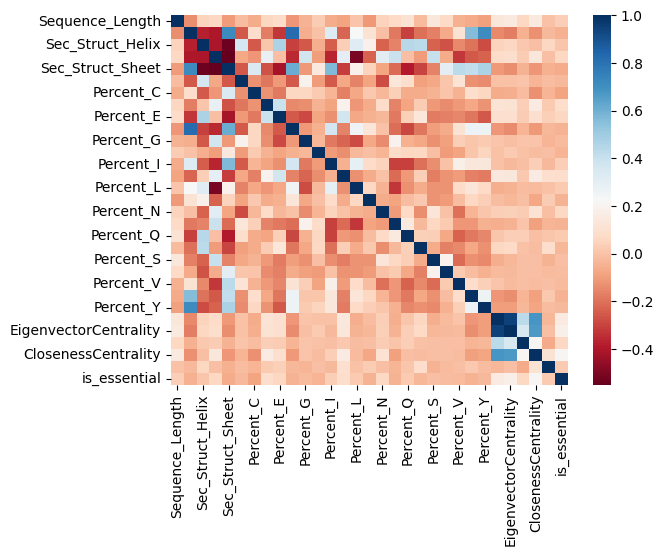

In [5]:
# Matriz de Correlação com Matplotlib Seaborn incluindo a classe de predição
sns.heatmap(df.corr(), cmap='RdBu');

plt.rcParams["figure.figsize"] = (15,12)

/tmp/ipykernel_7464/668890655.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, index)


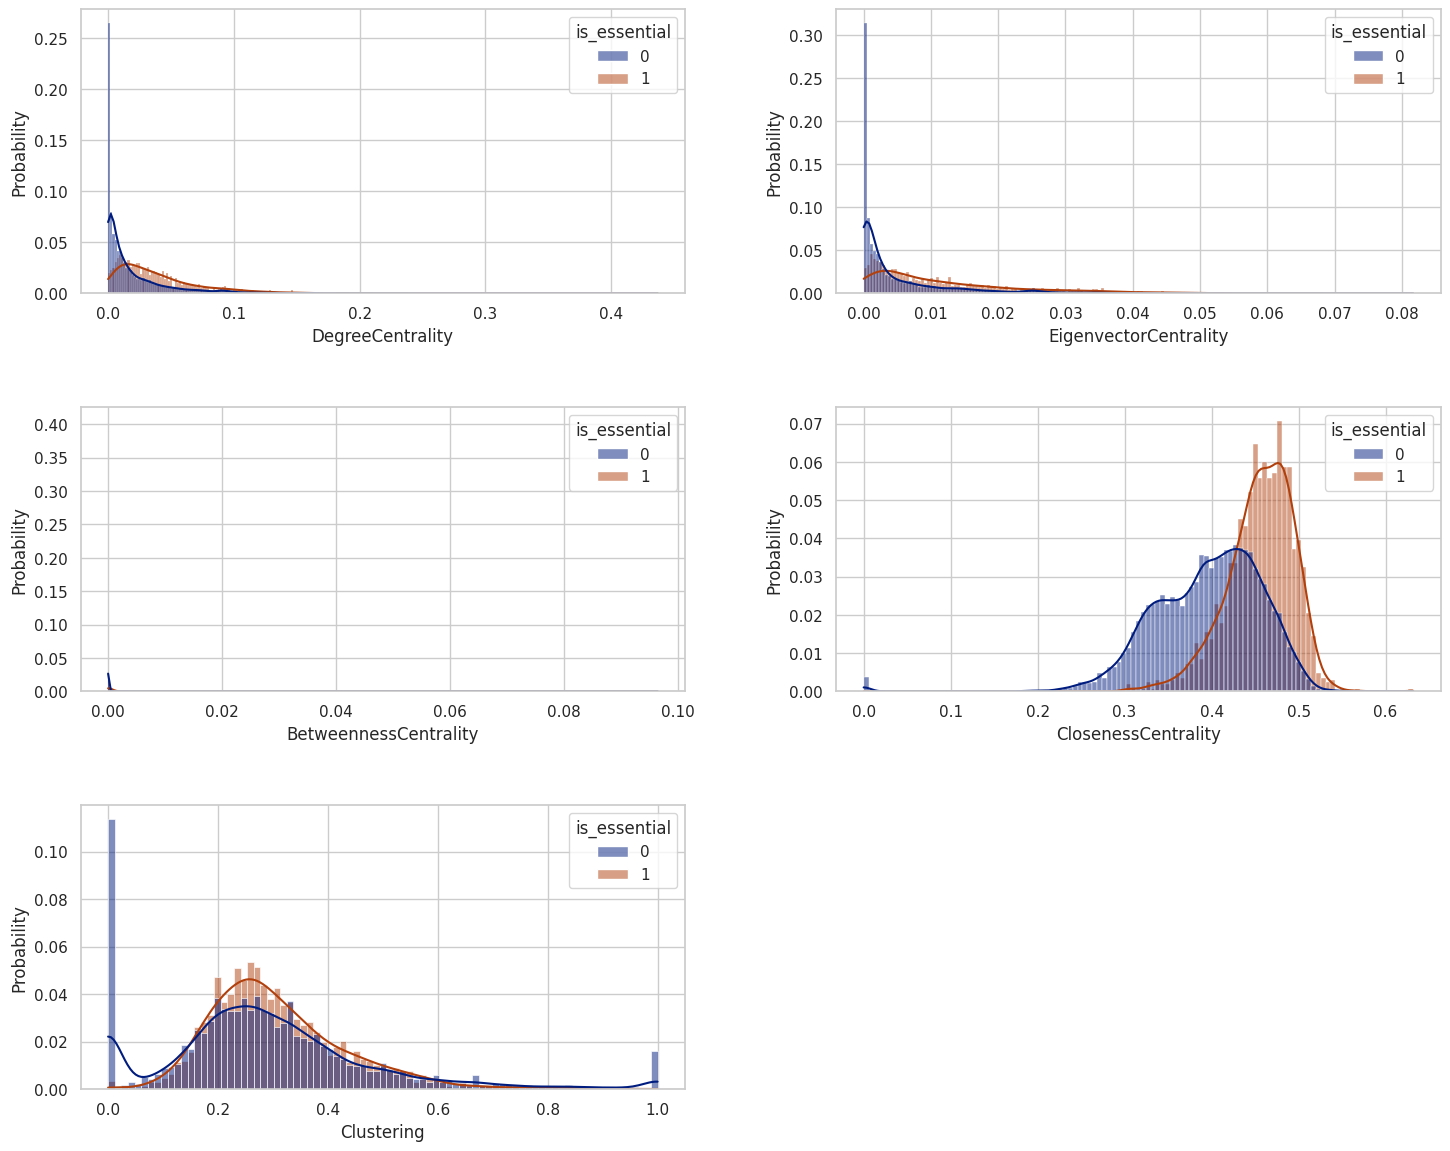

In [6]:
features = ['DegreeCentrality', 'EigenvectorCentrality', 'BetweennessCentrality',
       'ClosenessCentrality', 'Clustering']

plt.rcParams['figure.figsize'] = (16,12)

# Define as configurações dos plots
# Cada plot terá o mesmo tamanho de figuras (8,10)
#plt.style.use("ggplot")

plt.figure(1)

sns.set_theme(style="whitegrid", palette="dark")

plt.title('Distribuição dos dados - Baseadas em Sequência')

# Dados para cada subplot

for index, value in zip(range(1,6), features):
    plt.subplot(3, 2, index)
    sns.histplot(data=df, x=value, hue="is_essential", 
             stat="probability", common_norm=False, kde=True)

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.4,
                    wspace=0.25)

plt.savefig("results_centrality.jpg")
plt.show()


/tmp/ipykernel_7464/224055786.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8, 3, index)


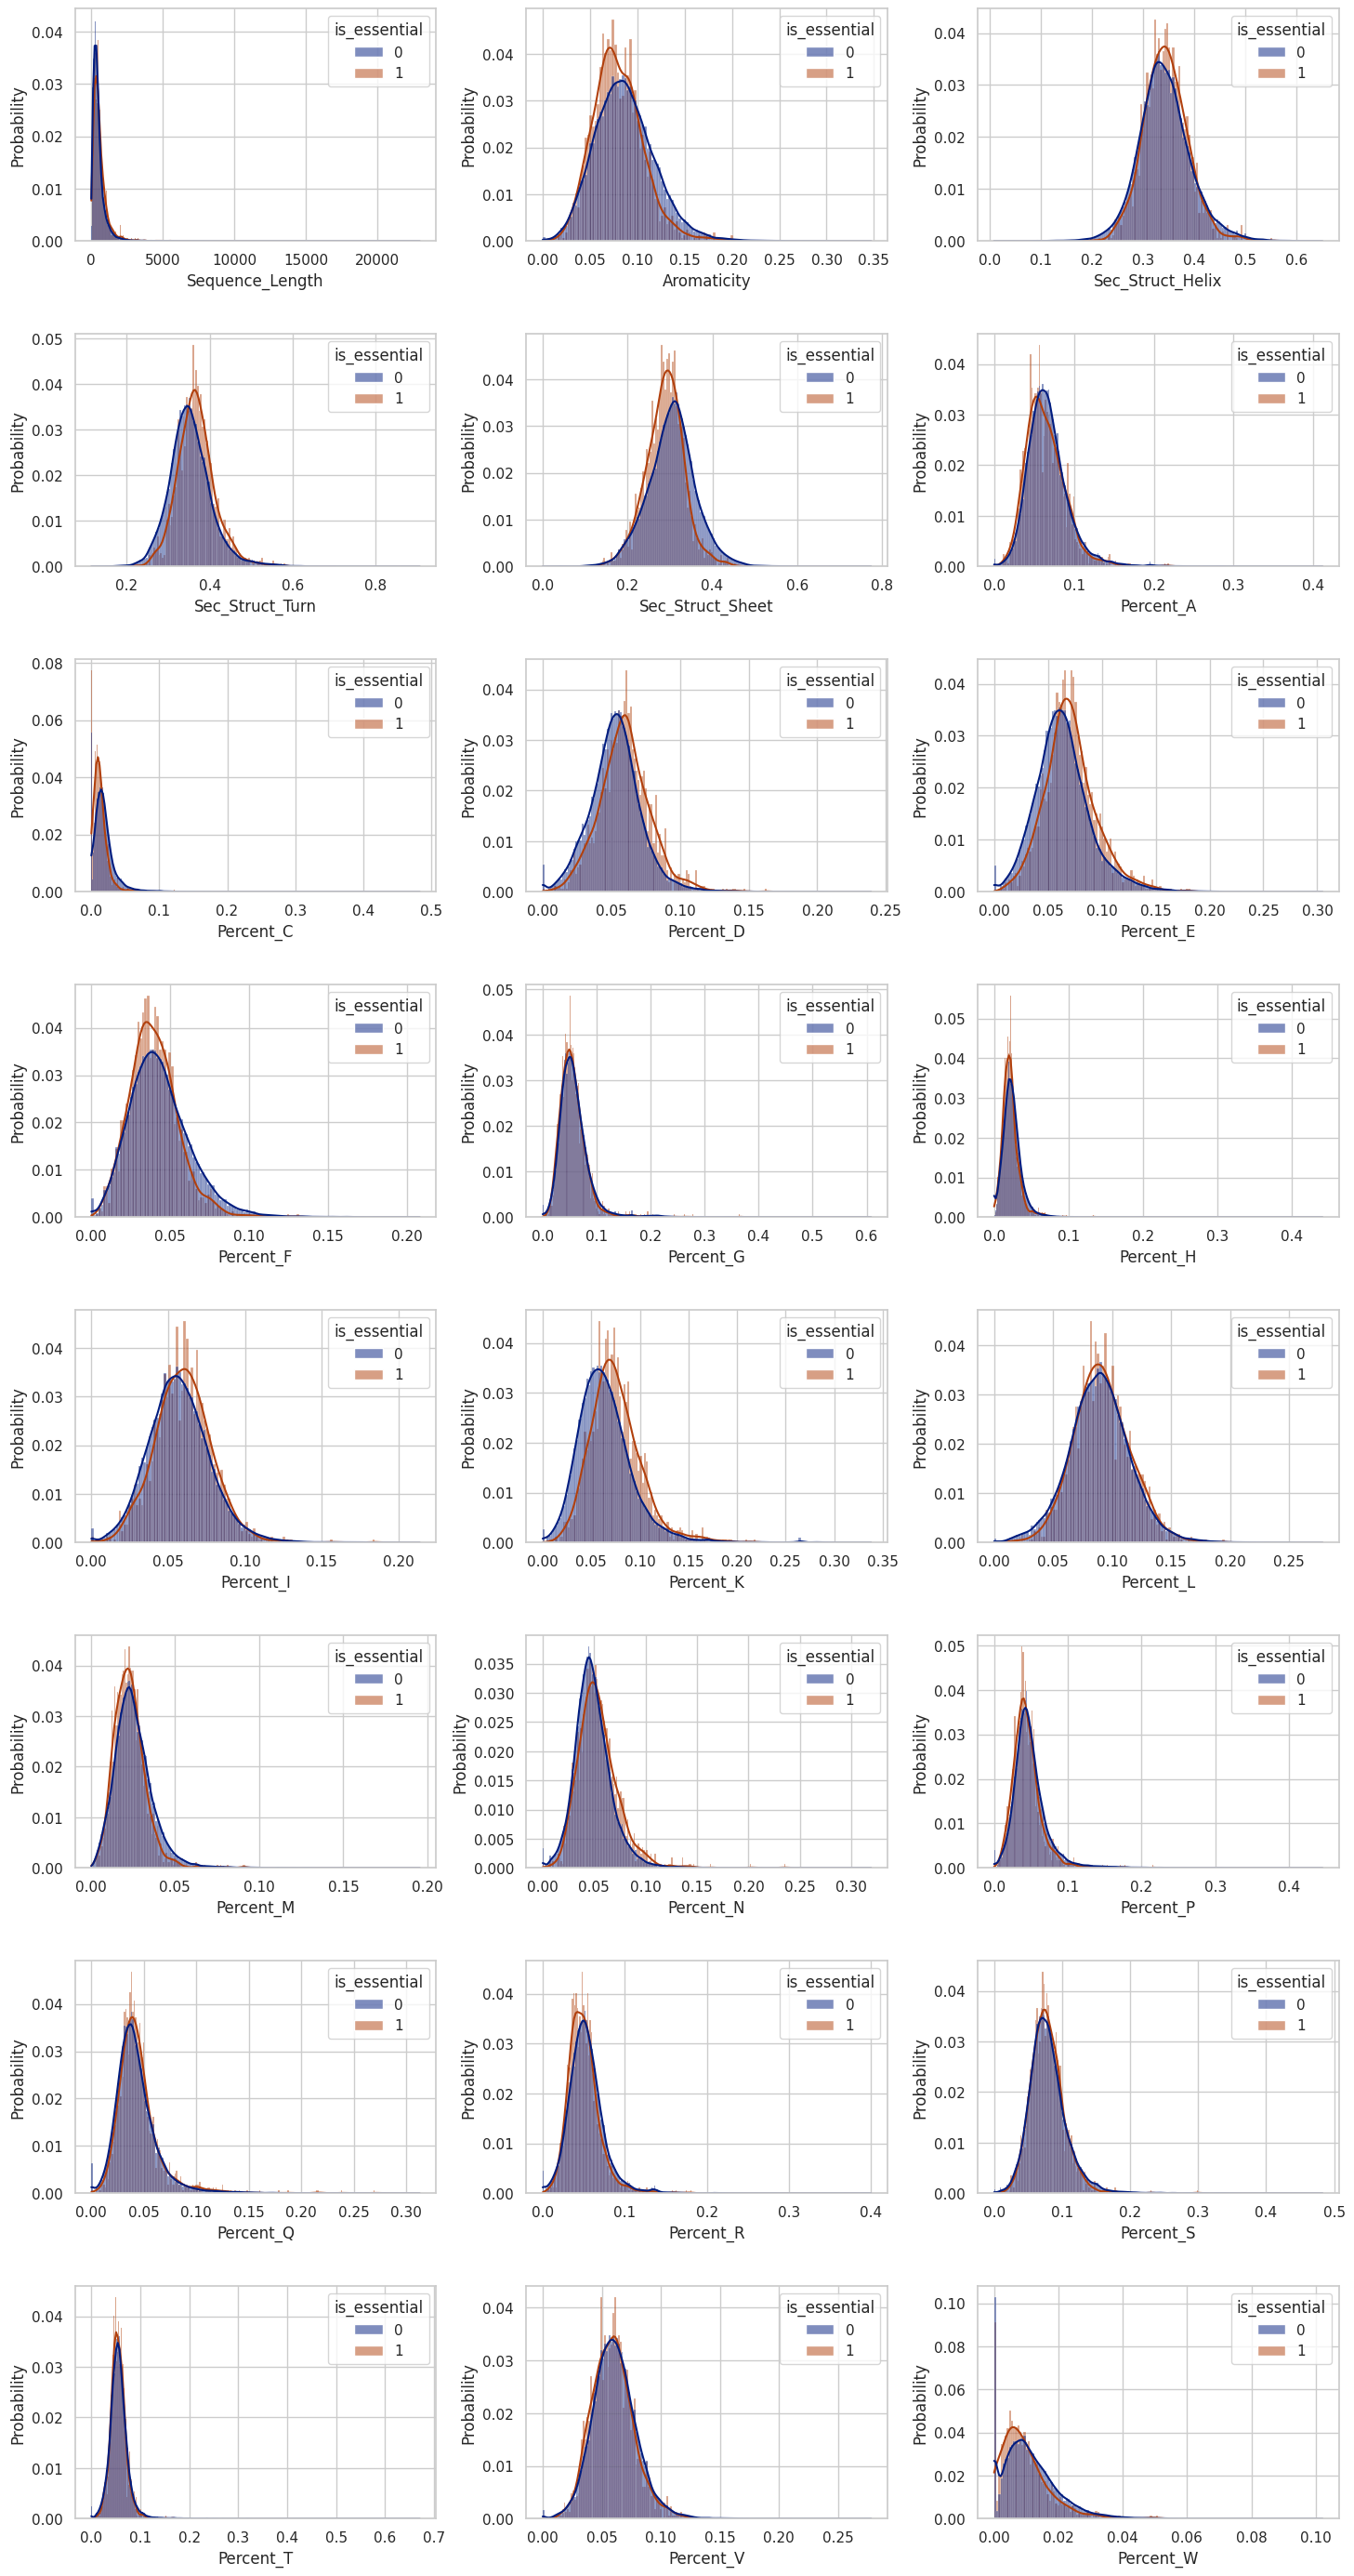

In [7]:
features_seq = ['Sequence_Length', 'Aromaticity', 'Sec_Struct_Helix',
       'Sec_Struct_Turn', 'Sec_Struct_Sheet', 'Percent_A', 'Percent_C',
       'Percent_D', 'Percent_E', 'Percent_F', 'Percent_G', 'Percent_H',
       'Percent_I', 'Percent_K', 'Percent_L', 'Percent_M', 'Percent_N',
       'Percent_P', 'Percent_Q', 'Percent_R', 'Percent_S', 'Percent_T',
       'Percent_V', 'Percent_W', 'Percent_Y']


plt.rcParams['figure.figsize'] = (16,30)

plt.figure(1)

sns.set_theme(style="whitegrid", palette="dark")

plt.title('Distribuição dos dados - Medidas de Centralidade e Clustering')

# Dados para cada subplot

for index, value in zip(range(1,25), features_seq):
    plt.subplot(8, 3, index)
    sns.histplot(data=df, x=value, hue="is_essential", 
             stat="probability", common_norm=False, kde=True)
    

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.4,
                    wspace=0.25)

plt.savefig("results_sequence.jpg")
plt.show()

### Funções

In [8]:
# Função para validação cruzada sem o uso de balanceamento na amostra de validação

def validacao_cruzada(model, X, y, sampling = False, method_sampling = None):
    kfold = KFold(n_splits = 5, shuffle=True)
    
    acuracias_split = []
    
    for idx, (idx_treino, idx_validacao) in enumerate(kfold.split(X)):
        X_split_treino = X.iloc[idx_treino, :]
        y_split_treino = y.iloc[idx_treino, :]
        
        
        if sampling: 
            # Método de Sampling
            sm = method_sampling
            X_split_treino, y_split_treino = sm.fit_resample(X_split_treino, y_split_treino)
            
        model.fit(X_split_treino, y_split_treino.values.ravel())  
        
        X_split_validacao = X.iloc[idx_validacao, :]
        y_split_validacao = y.iloc[idx_validacao, :]
        
        
        pred_validacoes = model.predict(X_split_validacao)
        
        acuracia_split = accuracy_score(y_split_validacao, pred_validacoes)
        
        acuracias_split.append(acuracia_split)
        
        print(f'Acurácia do split {idx}: {acuracia_split}')
        
        mean = np.mean(acuracias_split)
        
    return print(f'Média de Acurácia na validação cruzada: {mean}')

In [16]:
def gridsearch(X_train, y_train, model, param_grid, scoring, kfold):
    
    # busca exaustiva de hiperparâmetros com GridSearchCV
    grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=3, scoring=scoring, cv=kfold)
    grid_result = grid.fit(X_train, y_train)

    # imprime o melhor resultado
    print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

    # imprime todos os resultados
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f): %r" % (mean, stdev, param))

## Pré-processamento de Dados

In [10]:
# Separação em conjuntos de treino e teste
X = df.drop(['Protein_key','is_essential', 'Locus', 'Sequence'], axis=1)

y = df[['is_essential']]
test_size = 0.2
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    random_state=seed, 
                                                    stratify=y)

# Dados mansoni
df_mansoni = df_mansoni.set_index('Protein_key')
X_mansoni = df_mansoni.drop(['Locus', 'Sequence'], axis=1)
X_mansoni


# Dados musculus

df_musculus = df_musculus.set_index('Protein_key')
X_musculus = df_musculus.drop(['Locus', 'Sequence', 'is_essential' ], axis=1)
y_musculus = df_musculus['is_essential']
y_musculus

Protein_key
10090.ENSMUSP00000000001    0
10090.ENSMUSP00000000010    1
10090.ENSMUSP00000000028    0
10090.ENSMUSP00000000049    1
10090.ENSMUSP00000000058    0
                           ..
10090.ENSMUSP00000141134    0
10090.ENSMUSP00000141137    0
10090.ENSMUSP00000141166    0
10090.ENSMUSP00000141169    0
10090.ENSMUSP00000141183    0
Name: is_essential, Length: 19609, dtype: int64

### Sampling

In [11]:
## Undersampling

undersample = RandomUnderSampler(random_state=seed)

X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

y_train_under.value_counts()

is_essential
0               1334
1               1334
dtype: int64

In [12]:
## Oversampling

oversample = SMOTE(random_state=seed)

X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

y_train_over.value_counts()

is_essential
0               23074
1               23074
dtype: int64

In [13]:
## Combine

sample = SMOTEENN(random_state=seed)
#sample = SMOTETomek(random_state=seed)

X_train_sample, y_train_sample = sample.fit_resample(X_train, y_train)

y_train_sample.value_counts()

is_essential
1               20159
0               16386
dtype: int64

## Algoritmo XGBoost

In [17]:
param_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0],
              'max_depth': [6,7,8,9,10],
              'n_estimators': [100,200,300]}

In [18]:
xgbc = XGBClassifier(booster='gbtree', verbosity=1, random_state = seed)

scoring = 'balanced_accuracy'
kfold = 5

# Busca de Hiperparametros
gridsearch(X_train_over, y_train_over, xgbc, param_grid, scoring, kfold)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.868 total time=   4.2s
[CV 2/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.892 total time=   4.1s
[CV 3/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.894 total time=   4.1s
[CV 4/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.890 total time=   4.0s
[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.895 total time=   4.1s
[CV 1/5] END learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.897 total time=   7.9s
[CV 2/5] END learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.922 total time=   8.0s
[CV 3/5] END learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.923 total time=   8.1s
[CV 4/5] END learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.921 total time=   8.0s
[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.926 total t

[CV 2/5] END learning_rate=0.2, max_depth=6, n_estimators=300;, score=0.955 total time=  13.0s
[CV 3/5] END learning_rate=0.2, max_depth=6, n_estimators=300;, score=0.954 total time=  13.1s
[CV 4/5] END learning_rate=0.2, max_depth=6, n_estimators=300;, score=0.957 total time=  13.1s
[CV 5/5] END learning_rate=0.2, max_depth=6, n_estimators=300;, score=0.959 total time=  13.1s
[CV 1/5] END learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.913 total time=   5.3s
[CV 2/5] END learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.938 total time=   5.3s
[CV 3/5] END learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.935 total time=   5.2s
[CV 4/5] END learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.936 total time=   5.3s
[CV 5/5] END learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.938 total time=   5.3s
[CV 1/5] END learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.935 total time=  10.3s
[CV 2/5] END learning_rate=0.2, max_depth=7, n_est

[CV 4/5] END learning_rate=0.3, max_depth=7, n_estimators=200;, score=0.962 total time=  10.2s
[CV 5/5] END learning_rate=0.3, max_depth=7, n_estimators=200;, score=0.960 total time=  10.2s
[CV 1/5] END learning_rate=0.3, max_depth=7, n_estimators=300;, score=0.949 total time=  15.0s
[CV 2/5] END learning_rate=0.3, max_depth=7, n_estimators=300;, score=0.965 total time=  15.0s
[CV 3/5] END learning_rate=0.3, max_depth=7, n_estimators=300;, score=0.960 total time=  15.1s
[CV 4/5] END learning_rate=0.3, max_depth=7, n_estimators=300;, score=0.965 total time=  15.2s
[CV 5/5] END learning_rate=0.3, max_depth=7, n_estimators=300;, score=0.964 total time=  15.0s
[CV 1/5] END learning_rate=0.3, max_depth=8, n_estimators=100;, score=0.937 total time=   6.0s
[CV 2/5] END learning_rate=0.3, max_depth=8, n_estimators=100;, score=0.952 total time=   6.2s
[CV 3/5] END learning_rate=0.3, max_depth=8, n_estimators=100;, score=0.952 total time=   8.5s
[CV 4/5] END learning_rate=0.3, max_depth=8, n_est

[CV 1/5] END learning_rate=0.4, max_depth=8, n_estimators=200;, score=0.950 total time=  11.6s
[CV 2/5] END learning_rate=0.4, max_depth=8, n_estimators=200;, score=0.962 total time=  11.5s
[CV 3/5] END learning_rate=0.4, max_depth=8, n_estimators=200;, score=0.958 total time=  11.7s
[CV 4/5] END learning_rate=0.4, max_depth=8, n_estimators=200;, score=0.961 total time=  11.5s
[CV 5/5] END learning_rate=0.4, max_depth=8, n_estimators=200;, score=0.963 total time=  11.5s
[CV 1/5] END learning_rate=0.4, max_depth=8, n_estimators=300;, score=0.953 total time=  16.3s
[CV 2/5] END learning_rate=0.4, max_depth=8, n_estimators=300;, score=0.964 total time=  16.4s
[CV 3/5] END learning_rate=0.4, max_depth=8, n_estimators=300;, score=0.960 total time=  16.4s
[CV 4/5] END learning_rate=0.4, max_depth=8, n_estimators=300;, score=0.964 total time=  16.4s
[CV 5/5] END learning_rate=0.4, max_depth=8, n_estimators=300;, score=0.964 total time=  16.3s
[CV 1/5] END learning_rate=0.4, max_depth=9, n_est

[CV 3/5] END learning_rate=0.5, max_depth=9, n_estimators=100;, score=0.955 total time=   6.6s
[CV 4/5] END learning_rate=0.5, max_depth=9, n_estimators=100;, score=0.960 total time=   6.6s
[CV 5/5] END learning_rate=0.5, max_depth=9, n_estimators=100;, score=0.957 total time=   6.6s
[CV 1/5] END learning_rate=0.5, max_depth=9, n_estimators=200;, score=0.953 total time=  12.1s
[CV 2/5] END learning_rate=0.5, max_depth=9, n_estimators=200;, score=0.960 total time=  11.9s
[CV 3/5] END learning_rate=0.5, max_depth=9, n_estimators=200;, score=0.959 total time=  12.0s
[CV 4/5] END learning_rate=0.5, max_depth=9, n_estimators=200;, score=0.965 total time=  12.0s
[CV 5/5] END learning_rate=0.5, max_depth=9, n_estimators=200;, score=0.963 total time=  11.9s
[CV 1/5] END learning_rate=0.5, max_depth=9, n_estimators=300;, score=0.955 total time=  16.6s
[CV 2/5] END learning_rate=0.5, max_depth=9, n_estimators=300;, score=0.962 total time=  16.5s
[CV 3/5] END learning_rate=0.5, max_depth=9, n_est

[CV 5/5] END learning_rate=1.0, max_depth=9, n_estimators=300;, score=0.955 total time=  12.8s
[CV 1/5] END learning_rate=1.0, max_depth=10, n_estimators=100;, score=0.943 total time=   6.4s
[CV 2/5] END learning_rate=1.0, max_depth=10, n_estimators=100;, score=0.951 total time=   6.3s
[CV 3/5] END learning_rate=1.0, max_depth=10, n_estimators=100;, score=0.946 total time=   6.2s
[CV 4/5] END learning_rate=1.0, max_depth=10, n_estimators=100;, score=0.952 total time=   6.2s
[CV 5/5] END learning_rate=1.0, max_depth=10, n_estimators=100;, score=0.952 total time=   6.2s
[CV 1/5] END learning_rate=1.0, max_depth=10, n_estimators=200;, score=0.947 total time=  10.1s
[CV 2/5] END learning_rate=1.0, max_depth=10, n_estimators=200;, score=0.952 total time=  10.1s
[CV 3/5] END learning_rate=1.0, max_depth=10, n_estimators=200;, score=0.949 total time=  10.2s
[CV 4/5] END learning_rate=1.0, max_depth=10, n_estimators=200;, score=0.954 total time=  10.0s
[CV 5/5] END learning_rate=1.0, max_depth

In [ ]:
# Training the XGB classifier
xgbc.fit(X_train_over, y_train_over)

In [ ]:
# Verificando a importância das features

plt.rcParams['figure.figsize'] = (12,10)

importances = pd.Series(data=xgbc.feature_importances_, index=X_train.columns.values)

sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [ ]:
# Validação cruzada 
validacao_cruzada(xgbc, X_train, y_train, False)

In [ ]:
y_pred = xgbc.predict(X_test)

In [ ]:
# Scikit-learn
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

### Teste Mansoni com XGBoost

In [ ]:
# Predizendo proteínas do mansoni

y_mansoni_xgb = xgbc.predict(X_mansoni)
print(y_mansoni_xgb)

### Teste Musculus com XGBoost

In [ ]:
# Predizendo proteínas do mansoni

y_musculus_xgb = xgbc.predict(X_musculus)
print(y_musculus_xgb)

In [ ]:
print(classification_report(y_musculus, y_musculus_xgb))

### Algoritmo Random Forest

In [21]:
# Tunning RandomForest

# hiperparâmetros que serão avaliados
param_grid = dict(max_depth =[5,6,7,8,9,10],
                  bootstrap = [True, False],
                  criterion = ["gini", "entropy"],
                  n_estimators= [100,200,300])

In [22]:
scoring = 'balanced_accuracy'
kfold = 5

rfc = RandomForestClassifier(random_state = seed)

# Busca de Hiperparametros
gridsearch(X_train_over, y_train_over, rfc, param_grid, scoring, kfold)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=100;, score=0.771 total time=   7.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=100;, score=0.779 total time=   7.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=100;, score=0.779 total time=   7.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=100;, score=0.780 total time=   7.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=100;, score=0.779 total time=   7.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=200;, score=0.772 total time=  14.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=200;, score=0.780 total time=  14.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=200;, score=0.780 total time=  14.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=200;, score=0.781 total time=  13.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=200;, score=0.783 total time=  13.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=300;, score=0.771 total time=  21.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=300;, score=0.781 total time=  20.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=300;, score=0.780 total time=  20.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=300;, score=0.781 total time=  20.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=300;, score=0.781 total time=  20.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=6, n_estimators=100;, score=0.784 total time=   8.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=6, n_estimators=100;, score=0.791 total time=   8.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=6, n_estimators=100;, score=0.793 total time=   8.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=6, n_estimators=100;, score=0.793 total time=   8.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=6, n_estimators=100;, score=0.792 total time=   8.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=6, n_estimators=200;, score=0.784 total time=  16.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=6, n_estimators=200;, score=0.791 total time=  16.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=6, n_estimators=200;, score=0.794 total time=  16.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=6, n_estimators=200;, score=0.792 total time=  16.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=6, n_estimators=200;, score=0.791 total time=  16.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=6, n_estimators=300;, score=0.783 total time=  24.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=6, n_estimators=300;, score=0.792 total time=  24.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=6, n_estimators=300;, score=0.794 total time=  24.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=6, n_estimators=300;, score=0.793 total time=  24.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=6, n_estimators=300;, score=0.792 total time=  24.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=7, n_estimators=100;, score=0.795 total time=   9.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=7, n_estimators=100;, score=0.807 total time=   9.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=7, n_estimators=100;, score=0.807 total time=   9.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=7, n_estimators=100;, score=0.807 total time=   9.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=7, n_estimators=100;, score=0.804 total time=   9.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=7, n_estimators=200;, score=0.797 total time=  18.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=7, n_estimators=200;, score=0.807 total time=  18.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=7, n_estimators=200;, score=0.807 total time=  18.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=7, n_estimators=200;, score=0.810 total time=  18.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=7, n_estimators=200;, score=0.806 total time=  18.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=7, n_estimators=300;, score=0.797 total time=  28.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=7, n_estimators=300;, score=0.807 total time=  28.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=7, n_estimators=300;, score=0.807 total time=  28.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=7, n_estimators=300;, score=0.810 total time=  28.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=7, n_estimators=300;, score=0.806 total time=  28.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=8, n_estimators=100;, score=0.812 total time=  10.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=8, n_estimators=100;, score=0.821 total time=  10.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=8, n_estimators=100;, score=0.821 total time=  10.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=8, n_estimators=100;, score=0.823 total time=  10.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=8, n_estimators=100;, score=0.820 total time=  10.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=8, n_estimators=200;, score=0.812 total time=  21.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=8, n_estimators=200;, score=0.824 total time=  21.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=8, n_estimators=200;, score=0.823 total time=  21.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=8, n_estimators=200;, score=0.823 total time=  20.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=8, n_estimators=200;, score=0.822 total time=  21.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=8, n_estimators=300;, score=0.812 total time=  31.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=8, n_estimators=300;, score=0.822 total time=  31.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=8, n_estimators=300;, score=0.822 total time=  31.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=8, n_estimators=300;, score=0.824 total time=  31.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=8, n_estimators=300;, score=0.821 total time=  31.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=9, n_estimators=100;, score=0.829 total time=  11.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=9, n_estimators=100;, score=0.838 total time=  11.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=9, n_estimators=100;, score=0.838 total time=  11.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=9, n_estimators=100;, score=0.837 total time=  11.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=9, n_estimators=100;, score=0.836 total time=  11.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=9, n_estimators=200;, score=0.830 total time=  23.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=9, n_estimators=200;, score=0.837 total time=  23.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=9, n_estimators=200;, score=0.838 total time=  23.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=9, n_estimators=200;, score=0.837 total time=  23.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=9, n_estimators=200;, score=0.837 total time=  23.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=9, n_estimators=300;, score=0.830 total time=  34.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=9, n_estimators=300;, score=0.838 total time=  34.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=9, n_estimators=300;, score=0.838 total time=  34.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=9, n_estimators=300;, score=0.838 total time=  34.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=9, n_estimators=300;, score=0.838 total time=  34.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, n_estimators=100;, score=0.845 total time=  12.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, n_estimators=100;, score=0.853 total time=  12.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, n_estimators=100;, score=0.853 total time=  12.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=10, n_estimators=100;, score=0.856 total time=29.6min


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=10, n_estimators=100;, score=0.852 total time=  12.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, n_estimators=200;, score=0.847 total time=  25.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, n_estimators=200;, score=0.853 total time=  25.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, n_estimators=200;, score=0.854 total time=  25.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=10, n_estimators=200;, score=0.856 total time=  25.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=10, n_estimators=200;, score=0.855 total time=  25.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, n_estimators=300;, score=0.845 total time=  37.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, n_estimators=300;, score=0.852 total time=  37.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, n_estimators=300;, score=0.854 total time=  37.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=gini, max_depth=10, n_estimators=300;, score=0.855 total time=  37.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=gini, max_depth=10, n_estimators=300;, score=0.854 total time=  37.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=5, n_estimators=100;, score=0.769 total time=   8.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=5, n_estimators=100;, score=0.778 total time=   8.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=5, n_estimators=100;, score=0.780 total time=   8.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=5, n_estimators=100;, score=0.778 total time=   8.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=5, n_estimators=100;, score=0.779 total time=   8.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=5, n_estimators=200;, score=0.765 total time=  16.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=5, n_estimators=200;, score=0.779 total time=  16.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=5, n_estimators=200;, score=0.779 total time=  16.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=5, n_estimators=200;, score=0.778 total time=  16.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=5, n_estimators=200;, score=0.779 total time=  16.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=5, n_estimators=300;, score=0.765 total time=  24.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=5, n_estimators=300;, score=0.777 total time=  24.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=5, n_estimators=300;, score=0.779 total time=  24.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=5, n_estimators=300;, score=0.778 total time=  24.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=5, n_estimators=300;, score=0.778 total time=  24.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=6, n_estimators=100;, score=0.779 total time=   9.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=6, n_estimators=100;, score=0.790 total time=   9.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=6, n_estimators=100;, score=0.791 total time=   9.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=6, n_estimators=100;, score=0.786 total time=   9.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=6, n_estimators=100;, score=0.788 total time=   9.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=6, n_estimators=200;, score=0.778 total time=  19.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=6, n_estimators=200;, score=0.789 total time=  19.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=6, n_estimators=200;, score=0.791 total time=  19.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=6, n_estimators=200;, score=0.790 total time=  19.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=6, n_estimators=200;, score=0.788 total time=  19.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=6, n_estimators=300;, score=0.780 total time=  28.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=6, n_estimators=300;, score=0.789 total time=  29.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=6, n_estimators=300;, score=0.790 total time=  28.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=6, n_estimators=300;, score=0.791 total time=  28.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=6, n_estimators=300;, score=0.787 total time=  28.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=7, n_estimators=100;, score=0.792 total time=  10.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=7, n_estimators=100;, score=0.800 total time=  11.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=7, n_estimators=100;, score=0.803 total time=  11.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=7, n_estimators=100;, score=0.805 total time=  11.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=7, n_estimators=100;, score=0.801 total time=  11.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=7, n_estimators=200;, score=0.792 total time=  21.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=7, n_estimators=200;, score=0.801 total time=  22.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=7, n_estimators=200;, score=0.804 total time=  22.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=7, n_estimators=200;, score=0.803 total time=  22.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=7, n_estimators=200;, score=0.801 total time=  22.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=7, n_estimators=300;, score=0.792 total time=  32.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=7, n_estimators=300;, score=0.801 total time=  33.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=7, n_estimators=300;, score=0.802 total time=  32.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=7, n_estimators=300;, score=0.803 total time=  32.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=7, n_estimators=300;, score=0.800 total time=  33.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=100;, score=0.804 total time=  12.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=100;, score=0.815 total time=  12.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=100;, score=0.818 total time=  12.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=100;, score=0.816 total time=  12.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=100;, score=0.814 total time=  12.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=200;, score=0.805 total time=  24.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=200;, score=0.814 total time=  24.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=200;, score=0.818 total time=  25.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=200;, score=0.818 total time=  24.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=200;, score=0.815 total time=  24.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=300;, score=0.805 total time=  37.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=300;, score=0.814 total time=  37.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=300;, score=0.817 total time=  36.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=300;, score=0.818 total time=  38.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=300;, score=0.815 total time=  38.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=9, n_estimators=100;, score=0.820 total time=  14.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=9, n_estimators=100;, score=0.829 total time=  14.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=9, n_estimators=100;, score=0.832 total time=  14.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=9, n_estimators=100;, score=0.830 total time=  14.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=9, n_estimators=100;, score=0.832 total time=  14.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=9, n_estimators=200;, score=0.819 total time=  28.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=9, n_estimators=200;, score=0.828 total time=  28.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=9, n_estimators=200;, score=0.832 total time=  27.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=9, n_estimators=200;, score=0.831 total time=  27.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=9, n_estimators=200;, score=0.831 total time=  27.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=9, n_estimators=300;, score=0.820 total time=  40.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=9, n_estimators=300;, score=0.829 total time=  41.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=9, n_estimators=300;, score=0.832 total time=  40.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=9, n_estimators=300;, score=0.832 total time=  40.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=9, n_estimators=300;, score=0.831 total time=  40.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=100;, score=0.837 total time=  14.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=100;, score=0.846 total time=  14.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=100;, score=0.848 total time=  14.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=100;, score=0.846 total time=  14.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=100;, score=0.847 total time=  15.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=200;, score=0.837 total time=  29.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=200;, score=0.845 total time=  29.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=200;, score=0.850 total time=  29.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=200;, score=0.848 total time=  29.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=200;, score=0.846 total time=  29.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=300;, score=0.837 total time=  45.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=300;, score=0.844 total time=  44.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=300;, score=0.848 total time=  49.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=300;, score=0.847 total time=  48.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=10, n_estimators=300;, score=0.846 total time=  48.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=5, n_estimators=100;, score=0.770 total time=  10.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=5, n_estimators=100;, score=0.779 total time=  10.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=5, n_estimators=100;, score=0.779 total time=  11.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=5, n_estimators=100;, score=0.779 total time=  11.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=5, n_estimators=100;, score=0.780 total time=  11.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=5, n_estimators=200;, score=0.771 total time=  22.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=5, n_estimators=200;, score=0.780 total time=  22.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=5, n_estimators=200;, score=0.779 total time=  21.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=5, n_estimators=200;, score=0.781 total time=  21.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=5, n_estimators=200;, score=0.779 total time=  21.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=5, n_estimators=300;, score=0.770 total time=  32.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=5, n_estimators=300;, score=0.779 total time=  32.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=5, n_estimators=300;, score=0.778 total time=  32.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=5, n_estimators=300;, score=0.780 total time=  32.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=5, n_estimators=300;, score=0.780 total time=  32.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=6, n_estimators=100;, score=0.783 total time=  12.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=6, n_estimators=100;, score=0.791 total time=  12.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=6, n_estimators=100;, score=0.793 total time=  12.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=6, n_estimators=100;, score=0.792 total time=  12.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=6, n_estimators=100;, score=0.789 total time=  12.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=6, n_estimators=200;, score=0.784 total time=  25.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=6, n_estimators=200;, score=0.794 total time=  25.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=6, n_estimators=200;, score=0.793 total time=  25.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=6, n_estimators=200;, score=0.794 total time=  25.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=6, n_estimators=200;, score=0.791 total time=  25.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=6, n_estimators=300;, score=0.784 total time=  39.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=6, n_estimators=300;, score=0.793 total time=  38.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=6, n_estimators=300;, score=0.792 total time=  38.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=6, n_estimators=300;, score=0.793 total time=  38.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=6, n_estimators=300;, score=0.791 total time=  38.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=7, n_estimators=100;, score=0.799 total time=  14.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=7, n_estimators=100;, score=0.808 total time=  14.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=7, n_estimators=100;, score=0.806 total time=  14.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=7, n_estimators=100;, score=0.810 total time=  14.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=7, n_estimators=100;, score=0.806 total time=  14.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=7, n_estimators=200;, score=0.798 total time=  29.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=7, n_estimators=200;, score=0.807 total time=  29.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=7, n_estimators=200;, score=0.806 total time=  29.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=7, n_estimators=200;, score=0.809 total time=  29.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=7, n_estimators=200;, score=0.807 total time=  29.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=7, n_estimators=300;, score=0.798 total time=  44.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=7, n_estimators=300;, score=0.807 total time=  44.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=7, n_estimators=300;, score=0.806 total time=  44.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=7, n_estimators=300;, score=0.809 total time=  44.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=7, n_estimators=300;, score=0.805 total time=  44.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=8, n_estimators=100;, score=0.814 total time=  16.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=8, n_estimators=100;, score=0.824 total time=  16.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=8, n_estimators=100;, score=0.822 total time=  16.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=8, n_estimators=100;, score=0.824 total time=  16.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=8, n_estimators=100;, score=0.823 total time=  16.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=8, n_estimators=200;, score=0.813 total time=  33.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=8, n_estimators=200;, score=0.823 total time=  33.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=8, n_estimators=200;, score=0.822 total time=  33.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=8, n_estimators=200;, score=0.824 total time=  33.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=8, n_estimators=200;, score=0.822 total time=  33.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=8, n_estimators=300;, score=0.814 total time=  48.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=8, n_estimators=300;, score=0.825 total time=  47.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=8, n_estimators=300;, score=0.824 total time=  46.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=8, n_estimators=300;, score=0.823 total time=  46.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=8, n_estimators=300;, score=0.821 total time=  46.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=9, n_estimators=100;, score=0.833 total time=  17.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=9, n_estimators=100;, score=0.838 total time=  17.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=9, n_estimators=100;, score=0.837 total time=  17.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=9, n_estimators=100;, score=0.839 total time=  17.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=9, n_estimators=100;, score=0.841 total time=  17.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=9, n_estimators=200;, score=0.830 total time=  34.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=9, n_estimators=200;, score=0.838 total time=  34.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=9, n_estimators=200;, score=0.839 total time=  34.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=9, n_estimators=200;, score=0.838 total time=  34.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=9, n_estimators=200;, score=0.841 total time=  34.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=9, n_estimators=300;, score=0.832 total time=  51.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=9, n_estimators=300;, score=0.840 total time=  51.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=9, n_estimators=300;, score=0.840 total time=  51.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=9, n_estimators=300;, score=0.840 total time=  51.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=9, n_estimators=300;, score=0.839 total time=  51.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=10, n_estimators=100;, score=0.851 total time=  18.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=10, n_estimators=100;, score=0.859 total time=  18.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=10, n_estimators=100;, score=0.857 total time=  18.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=10, n_estimators=100;, score=0.858 total time=  18.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=10, n_estimators=100;, score=0.857 total time=  18.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=10, n_estimators=200;, score=0.850 total time=  37.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=10, n_estimators=200;, score=0.858 total time=  37.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=10, n_estimators=200;, score=0.856 total time=  37.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=10, n_estimators=200;, score=0.858 total time=  37.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=10, n_estimators=200;, score=0.857 total time=  37.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=gini, max_depth=10, n_estimators=300;, score=0.848 total time=  56.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=10, n_estimators=300;, score=0.858 total time=  56.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=10, n_estimators=300;, score=0.857 total time=  56.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=gini, max_depth=10, n_estimators=300;, score=0.857 total time=  56.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=gini, max_depth=10, n_estimators=300;, score=0.857 total time=  56.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=100;, score=0.766 total time=  12.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=100;, score=0.779 total time=  12.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=100;, score=0.776 total time=  12.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=100;, score=0.777 total time=  12.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=100;, score=0.778 total time=  12.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=200;, score=0.767 total time=  24.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=200;, score=0.779 total time=  24.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=200;, score=0.778 total time=  24.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=200;, score=0.776 total time=  24.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=200;, score=0.776 total time=  24.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=300;, score=0.764 total time=  36.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=300;, score=0.778 total time=  36.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=300;, score=0.776 total time=  36.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=300;, score=0.776 total time=  36.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=300;, score=0.777 total time=  36.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=6, n_estimators=100;, score=0.779 total time=  14.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=6, n_estimators=100;, score=0.791 total time=  14.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=6, n_estimators=100;, score=0.789 total time=  14.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=6, n_estimators=100;, score=0.788 total time=  14.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=6, n_estimators=100;, score=0.787 total time=  14.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=6, n_estimators=200;, score=0.779 total time=  28.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=6, n_estimators=200;, score=0.792 total time=  28.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=6, n_estimators=200;, score=0.790 total time=  28.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=6, n_estimators=200;, score=0.788 total time=  28.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=6, n_estimators=200;, score=0.788 total time=  28.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=6, n_estimators=300;, score=0.780 total time=  43.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=6, n_estimators=300;, score=0.790 total time=  43.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=6, n_estimators=300;, score=0.789 total time=  43.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=6, n_estimators=300;, score=0.787 total time=  43.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=6, n_estimators=300;, score=0.788 total time=  43.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=7, n_estimators=100;, score=0.790 total time=  16.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=7, n_estimators=100;, score=0.802 total time=  16.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=7, n_estimators=100;, score=0.804 total time=  16.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=7, n_estimators=100;, score=0.804 total time=  16.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=7, n_estimators=100;, score=0.799 total time=  16.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=7, n_estimators=200;, score=0.790 total time=  33.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=7, n_estimators=200;, score=0.803 total time=  33.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=7, n_estimators=200;, score=0.802 total time=  33.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=7, n_estimators=200;, score=0.804 total time=  33.0s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=7, n_estimators=200;, score=0.801 total time=  34.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=7, n_estimators=300;, score=0.791 total time=  51.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=7, n_estimators=300;, score=0.803 total time=  50.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=7, n_estimators=300;, score=0.803 total time=  51.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=7, n_estimators=300;, score=0.802 total time=  50.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=7, n_estimators=300;, score=0.801 total time=  50.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=8, n_estimators=100;, score=0.805 total time=  19.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=8, n_estimators=100;, score=0.814 total time=  19.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=8, n_estimators=100;, score=0.814 total time=  18.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=8, n_estimators=100;, score=0.817 total time=  19.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=8, n_estimators=100;, score=0.816 total time=  19.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=8, n_estimators=200;, score=0.806 total time=  38.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=8, n_estimators=200;, score=0.814 total time=  39.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=8, n_estimators=200;, score=0.815 total time=  38.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=8, n_estimators=200;, score=0.816 total time=  38.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=8, n_estimators=200;, score=0.817 total time=  38.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=8, n_estimators=300;, score=0.807 total time=  57.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=8, n_estimators=300;, score=0.816 total time=  57.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=8, n_estimators=300;, score=0.815 total time=  57.5s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=8, n_estimators=300;, score=0.816 total time=  57.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=8, n_estimators=300;, score=0.816 total time=  57.9s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=9, n_estimators=100;, score=0.821 total time=  21.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=9, n_estimators=100;, score=0.833 total time=  21.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=9, n_estimators=100;, score=0.831 total time=  21.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=9, n_estimators=100;, score=0.832 total time=  21.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=9, n_estimators=100;, score=0.832 total time=  21.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=9, n_estimators=200;, score=0.821 total time=  42.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=9, n_estimators=200;, score=0.833 total time=  42.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=9, n_estimators=200;, score=0.832 total time=  42.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=9, n_estimators=200;, score=0.833 total time=  43.3s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=9, n_estimators=200;, score=0.832 total time=  41.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=9, n_estimators=300;, score=0.821 total time= 1.0min


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=9, n_estimators=300;, score=0.833 total time= 1.0min


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=9, n_estimators=300;, score=0.832 total time= 1.0min


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=9, n_estimators=300;, score=0.833 total time= 1.0min


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=9, n_estimators=300;, score=0.832 total time= 1.0min


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=10, n_estimators=100;, score=0.837 total time=  22.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=10, n_estimators=100;, score=0.849 total time=  22.1s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=10, n_estimators=100;, score=0.850 total time=  22.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=10, n_estimators=100;, score=0.847 total time=  22.4s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=10, n_estimators=100;, score=0.849 total time=  22.2s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=10, n_estimators=200;, score=0.838 total time=  44.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=10, n_estimators=200;, score=0.849 total time=  44.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=10, n_estimators=200;, score=0.851 total time=  44.7s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=10, n_estimators=200;, score=0.848 total time=  44.8s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=10, n_estimators=200;, score=0.848 total time=  44.6s


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=10, n_estimators=300;, score=0.839 total time= 1.1min


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=10, n_estimators=300;, score=0.849 total time= 1.1min


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=10, n_estimators=300;, score=0.851 total time= 1.2min


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=10, n_estimators=300;, score=0.848 total time= 1.2min


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=10, n_estimators=300;, score=0.848 total time= 1.2min


/home/jessica/Documentos/projetos/lib/python3.8/site-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Melhor: 0.856289 usando {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
0.777564 (0.003422): {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
0.778842 (0.003755): {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'n_estimators': 200}
0.778691 (0.004100): {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'n_estimators': 300}
0.790804 (0.003316): {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}
0.790522 (0.003666): {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'n_estimators': 200}
0.790869 (0.003881): {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'n_estimators': 300}
0.804260 (0.004700): {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'n_estimators': 100}
0.805387 (0.004660): {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'n_estimators': 200}
0.805214 (0.004340): {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'n_estimators': 300}
0.819

In [ ]:
rfc.fit(X_train_over, y_train_over)

In [ ]:
# Verificando a importância de cada feature

plt.rcParams['figure.figsize'] = (12,10)

importances = pd.Series(data=rfc.feature_importances_, index=X_train.columns.values)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [ ]:
# Validação cruzada 
validacao_cruzada(rfc, X_train, y_train, False)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
# Scikit-learn
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

### Teste Mansoni com Random Forest

In [ ]:
# Predizendo proteínas do mansoni

y_mansoni_rf = rfc.predict(X_mansoni)

print(y_mansoni_rf)

### Teste Musculus com Random Forest

In [ ]:
# Predizendo proteínas do mansoni

y_musculus_rf = rfc.predict(X_musculus)

print(y_musculus_rf)

In [ ]:
print(classification_report(y_musculus, y_musculus_rf))

### Unindo datasets

In [ ]:
X_mansoni['predict_xgboost'] = y_mansoni_xgb

X_mansoni['predict_rfc'] = y_mansoni_rf

X_mansoni

In [ ]:
# Contando as proteínas candidatas a essenciais

X_mansoni['predict_xgboost'].value_counts()

In [ ]:
# Contando as proteínas candidatas a essenciais

X_mansoni['predict_rfc'].value_counts()

In [ ]:
X_mansoni[(X_mansoni['predict_xgboost'] == 1) & (X_mansoni['predict_rfc'] == 1)]

In [ ]:
# Dataset de descrição das proteínas

df_description = pd.read_csv("data/info_protein_mansoni.txt", sep="\t")
df_description

In [ ]:
X_mansoni = X_mansoni.reset_index()

In [ ]:
# Merge Datasets
df_final = df_mansoni.merge(df_description, how='inner', left_on = 'Protein_key', right_on='string_protein_id')
df_final

In [ ]:
df_final.to_csv('results_mansoni.csv')